**MNIST Example **
from https://www.tensorflow.org/versions/r0.8/tutorials/mnist/beginners/index.html#mnist-for-ml-beginners

In [1]:
"""Functions for downloading and reading MNIST data."""
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import gzip
import os
import tempfile

import numpy
from six.moves import urllib
from six.moves import xrange  # pylint: disable=redefined-builtin
import tensorflow as tf
#from tensorflow.contrib.learn.python.learn.datasets.mnist import read_data_sets
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)


Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [2]:
flags = tf.app.flags
FLAGS = flags.FLAGS
flags.DEFINE_string('data_dir', '/tmp/data/', 'Directory for storing data')



sess = tf.InteractiveSession()

In [9]:
test_len=mnist.test.images.shape

train_len = mnist.train.num_examples
valid_len = mnist.validation.num_examples
print (train_len, test_len, valid_len)
#print ((mnist.test.labels[0,:]))

55000 (10000, 784) 5000


In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

3


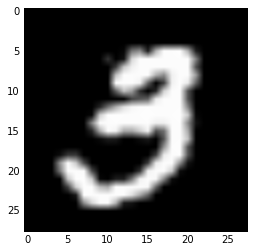

In [24]:
n=753
a=numpy.reshape(mnist.train.images[n,:], (28,28))
#data = array([[7, 4, 6], [7, 7, 6], [4, 7, 9]])
plt.imshow(a, 'gray', origin='upper')
print (numpy.argmax(mnist.train.labels[n,:]))

x isn't a specific value. It's a placeholder, a value that we'll input when we ask TensorFlow to run a computation. We want to be able to input any number of MNIST images, each flattened into a 784-dimensional vector. We represent this as a 2-D tensor of floating-point numbers, with a shape [None, 784]. (Here None means that a dimension can be of any length.)

We also need the weights and biases for our model. We could imagine treating these like additional inputs, but TensorFlow has an even better way to handle it: Variable. A Variable is a modifiable tensor that lives in TensorFlow's graph of interacting operations. It can be used and even modified by the computation. For machine learning applications, one generally has the model parameters be Variables.

In [21]:
# Create the model
x = tf.placeholder(tf.float32, [None, 784])
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))
y = tf.nn.softmax(tf.matmul(x, W) + b)


In [22]:
# Define loss and optimizer
y_ = tf.placeholder(tf.float32, [None, 10])
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)


In [24]:
init = tf.initialize_all_variables()

sess.run(init)
# Train

for i in range(1000):
  batch_xs, batch_ys = mnist.train.next_batch(100)
  train_step.run({x: batch_xs, y_: batch_ys})


In [25]:
# Test trained model
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(accuracy.eval({x: mnist.test.images, y_: mnist.test.labels}))

0.9206


In [27]:
print(accuracy.eval({x: mnist.validation.images, y_: mnist.validation.labels}))

0.9224
